### ARIMA Model for Stock

#### Installing pmdarima

In [1]:
!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read training data

In [3]:
train=pd.read_csv("GOOG_train.csv")
# train = train.set_index('Date')
test=pd.read_csv("GOOG_test.csv")
# test = test.set_index('Date')
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
1,2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2,2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
3,2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
4,2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500
...,...,...,...,...,...,...,...
1253,2021-06-03,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
1254,2021-06-04,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
1255,2021-06-07,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
1256,2021-06-08,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000


#### Basic information of data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


#### 'Close' column as training data

In [6]:
train_list1=train["Close"]
train_list1=list(train_list1)
test_list1=test["Close"]
test_list1=list(test_list1)

In [7]:
len(train_list1) , len(test_list1)

(1258, 253)

#### Importing adfuller function from statsmodel

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_list1)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.9368159937737108
p-value: 0.9985850027950328


p-value is quite high(>0.05), So time series is not stationary

#### Importing auto_arima 

In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

#### Using auto_arima to get the best model

In [10]:
step_fit1 = auto_arima(train_list1,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11344.912, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11352.162, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11339.446, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11340.105, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11355.272, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11341.026, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11340.960, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11342.904, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11343.758, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.843 seconds


#### Making train data as all data points except the last 30 and test data points as the last 30 data points

In [11]:
train_data_1228= train_list1[:-30]
test_data_30 = train_list1[-30:]
print(len(train_data_1228),len(test_data_30))

1228 30


#### Creating ARIMA model

In [12]:
import statsmodels.api as sm
model1 = sm.tsa.arima.ARIMA(train_list1, order=(1,1,0))
result1 = model1.fit()
step_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -5666.723
Date:                Thu, 28 Jul 2022   AIC                          11339.446
Time:                        22:55:31   BIC                          11354.855
Sample:                             0   HQIC                         11345.237
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5632      0.622      2.512      0.012       0.343       2.783
ar.L1         -0.1079      0.017     -6.468      0.000      -0.141      -0.075
sigma2       482.5873      9.404     51.315      0.000     464.155     501.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2176.84
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.42   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Fit the model and predict the results

In [13]:
start = len(train_data_1228)
end = len(train_data_1228)+len(test_data_30)-1
pred1 = result1.predict(start=start,end=end)

In [14]:
len(pred1)

30

#### Plotting actual and predicted results on graph

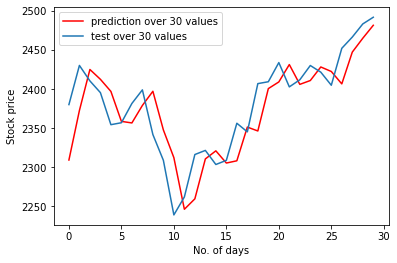

In [15]:
import matplotlib.pyplot as plt

plt.plot(pred1,color = 'r',label='prediction over 30 values')
plt.plot(test_data_30,label='test over 30 values')
plt.xlabel('No. of days')
plt.ylabel('Stock price')
plt.legend()
plt.show()

#### Mean square error

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
print(f'MSE is =',sqrt(mean_squared_error(test_data_30,pred1)))
print(f'R2 score is',r2_score(test_data_30,pred1)*100,'%')

MSE is = 34.89125872422999
R2 score is 67.39428036765915 %


r2 is not good over 30 days test data. Hence considering the training and test data for

#### 'Close' column as training data

In [17]:
train_list2=train["Close"]
train_list2=list(train_list1)
test_list2=test["Close"]
test_list2=list(test_list2)

In [18]:
len(train_list2) , len(test_list2)

(1258, 253)

In [19]:
train_list2.extend(test_list2)
len(train_list2)

1511

#### Importing adfuller function from statsmodel

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_list2)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.6136582483986688
p-value: 0.8678658599134333


p-value is also quite high here(>0.05), So time series is not stationary

#### Importing auto_arima 

In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

#### Using auto_arima to get the best model

In [22]:
step_fit2 = auto_arima(train_list2,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14347.096, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14353.081, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14344.966, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14345.393, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14353.185, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14346.190, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14344.779, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14346.779, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14346.779, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14346.728, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14345.148, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.107 seconds


#### Using training data for training the model over 1258 data and for testing using test data as 253

In [23]:
train= train_list2[:-253]
test = train_list2[-253:]
print(len(train),len(test))

1258 253


#### Creating ARIMA model

In [24]:
import statsmodels.api as sm
model2 = sm.tsa.arima.ARIMA(train_list2, order=(1,1,1))
result2 = model2.fit()
step_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7168.390
Date:                Thu, 28 Jul 2022   AIC                          14344.779
Time:                        22:55:36   BIC                          14366.059
Sample:                             0   HQIC                         14352.704
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5704      1.044      1.504      0.133      -0.476       3.617
ar.L1         -0.4993      0.135     -3.690      0.000      -0.764      -0.234
ma.L1          0.4209      0.140      2.997      0.003       0.146       0.696
sigma2       777.9778     14.115     55.116      0.000     750.313     805.643
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2307.80
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.50   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Fit the model and predict the results

In [25]:
start = len(train)
end = len(train)+len(test)-1
pred2 = result2.predict(start=start,end=end)
len(pred2)

253

#### Plotting actual and predicted results on graph

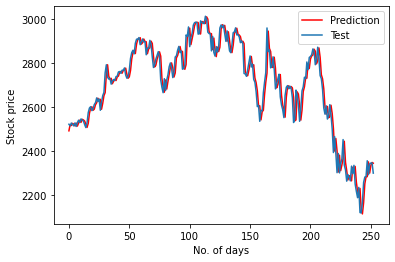

In [26]:
import matplotlib.pyplot as plt

plt.plot(pred2,color = 'r',label='Prediction')
plt.plot(test,label='Test')
plt.xlabel('No. of days')
plt.ylabel('Stock price')
plt.legend(loc='best')
plt.show()

#### Mean square error

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
print(f'MSE is =',sqrt(mean_squared_error(test,pred2)))
print(f'R2 score is',r2_score(test,pred2)*100,'%')

MSE is = 47.351603030158756
R2 score is 94.66613348579128 %


This data has pretty good R2 score

### Predicting and plotting results for future stocks

In [28]:
future_stock_prediction = result2.predict(start=len(train_list2),end=len(train_list2)+30)

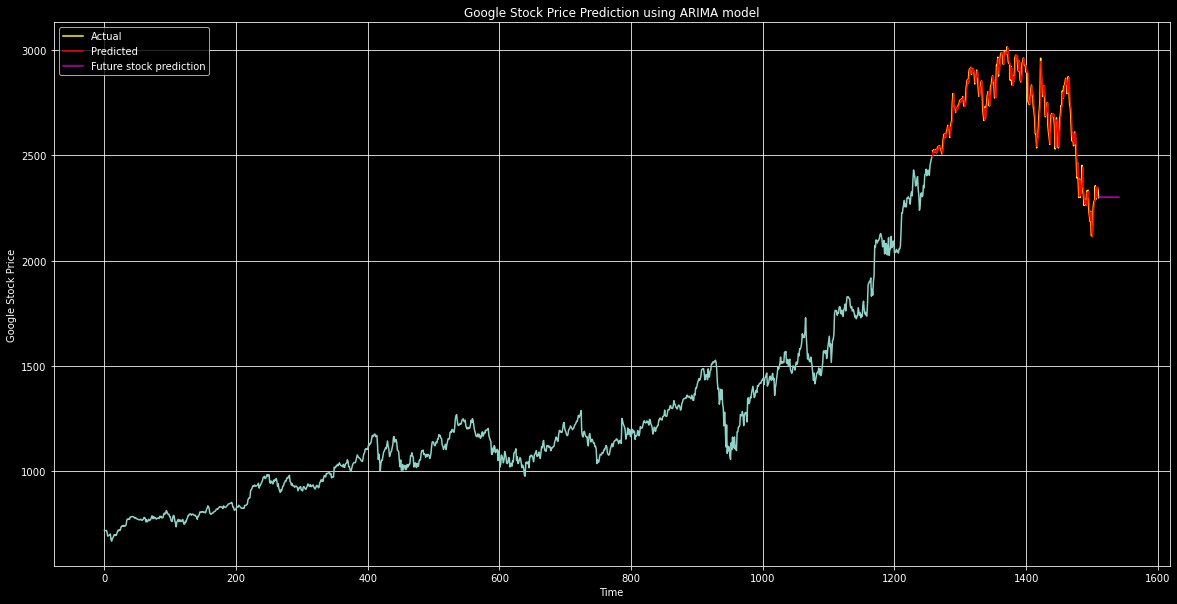

In [36]:
plt.figure(figsize=(20, 10))
plt.style.use('dark_background')
plt.plot(np.arange(len(train)),train)
plt.plot(np.arange(len(train),len(train)+len(test)),test,color='yellow',label='Actual')
plt.plot(np.arange(len(train),len(train)+len(test)),pred2,color = 'r',label='Predicted')
plt.plot(np.arange(len(train)+len(test),len(train)+len(test)+31),future_stock_prediction,color='m',label='Future stock prediction')
plt.title('Google Stock Price Prediction using ARIMA model')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend(loc='best')
plt.grid()
plt.show()